<a href="https://colab.research.google.com/github/melody199810/EDA/blob/main/Yao_Jing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Link to blog post on Medium:
https://jingy.medium.com/my-first-exploratory-data-analysis-eda-on-coursera-dataset-29d2b2a5c1ab

Github link to dataset:
https://github.com/melody199810/EDA/commit/7dfdf52adb1bcf0f629171c2d95fbea9c8f30371

Github link to repo:
https://github.com/melody199810/EDA

Copy of dataset available here:
https://drive.google.com/file/d/1HZD22HQhxTQA25MGZAM4vkq9ebGbzON-/view?usp=sharing

In [2]:
# preparation - importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Overview & Preparation


In [ ]:
#converting file to dataframe and get some initial idea of how it looks like
df = pd.read_csv('coursea_data.csv')
df.head()

In [105]:
#get shape of data
print('The shape of our features is:', df.shape)


The shape of our features is: (891, 7)


In [106]:
# Descriptive statistics for each column
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [ ]:
#check if any data is missing;
df.isnull()

In [ ]:
#get information such as data types 
df.info()

In [ ]:
#check if there's any duplicate rows
df_duplicate = df[df.duplicated()]
df_duplicate

In [ ]:
#Deleting the meaningless first column
df.drop(columns = 'Unnamed: 0')


In [ ]:
# improving data usability - converting 'xx k' or 'xx m' to a number
new_num_list = []
for i in range(0, len(df)):
    try:
        num = df['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        new_num_list.append(num)
    except:
        num = df['course_students_enrolled'].astype(str).str.split('m')[i][0]
        num = float(num) * 1000000
        new_num_list.append(num)
print(new_num_list)
df['new_course_students_enrolled'] = new_num_list
df['new_course_students_enrolled'] = df['new_course_students_enrolled'].astype(float)
df



In [112]:
#download the cleaned dataset for Tableau use locally
from google.colab import files
df.to_csv('sample.csv')

# Visualization


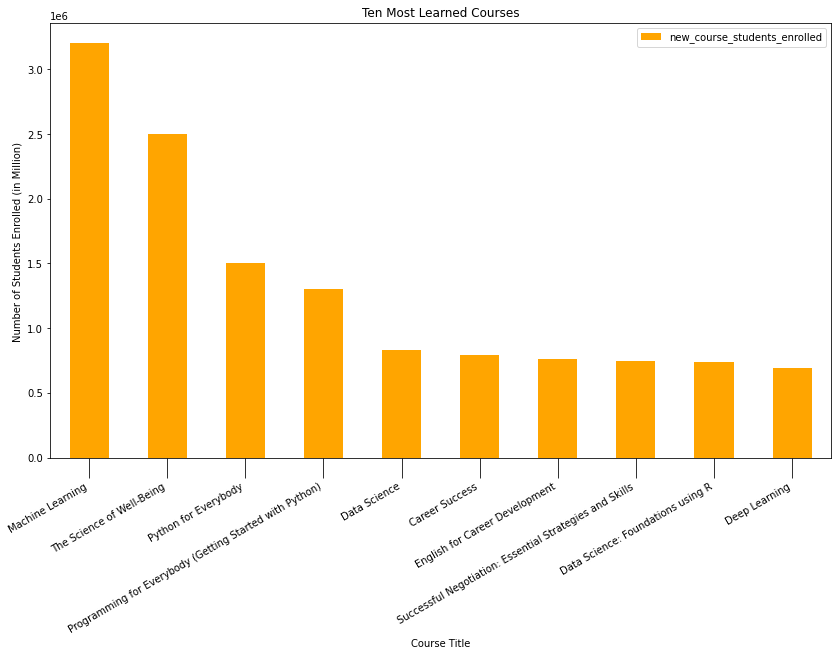

In [9]:
#What are the most learned courses?

df.sort_values(by='new_course_students_enrolled',ascending=False)
df_most_learned = df.sort_values(by='new_course_students_enrolled',ascending=False).head(10)
df_most_learned
fig1 = df_most_learned.plot.bar(x='course_title', y='new_course_students_enrolled', figsize=(14,8), title="Ten Most Learned Courses", color = 'orange')
fig1=plt.xlabel('Course Title')
fig1=plt.xticks(rotation = 30,horizontalalignment='right')
fig1=plt.tick_params('x',length = 20)
fig1=plt.ylabel('Number of Students Enrolled (in Million) ')




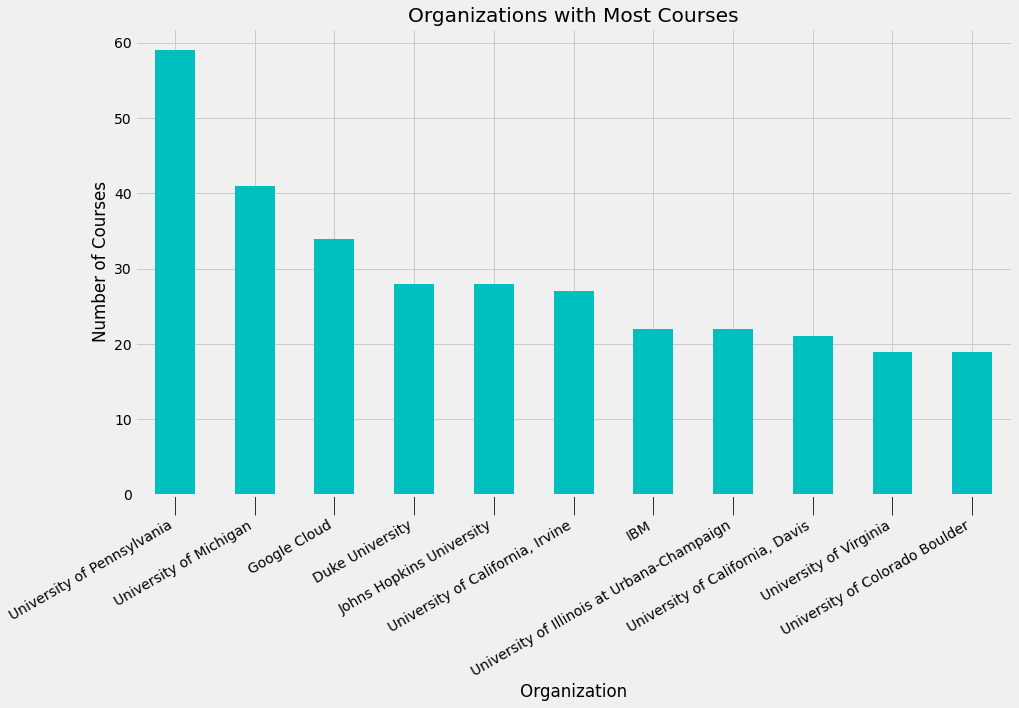

In [10]:
# number of courses by organization
plt.style.use('fivethirtyeight')
class_1 = df['course_organization'].value_counts()

fig2 = class_1[:11].plot(kind='bar',figsize=(14,8), title='Organizations with Most Courses', color = 'c')
fig2.set_xlabel("Organization",)
fig2.set_ylabel("Number of Courses")
fig2=plt.xticks(rotation = 30,horizontalalignment='right')
fig2=plt.tick_params('x',length = 20)
fig2=plt.show()

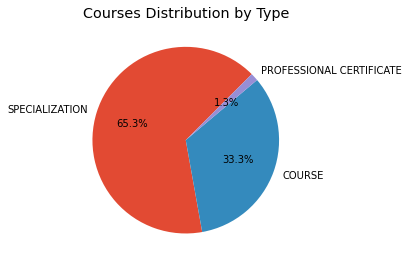

In [11]:
# distribution of course types (pie chart)
plt.style.use('ggplot')
types = []
for i in df['course_Certificate_type']:
  if i not in types:
    types.append(i)

class_2 = df['course_Certificate_type'].value_counts()
fig3 = plt.pie(class_2, labels= types, autopct='%.1f%%', startangle=45)
fig3 = plt.title('Courses Distribution by Type')
plt.show()

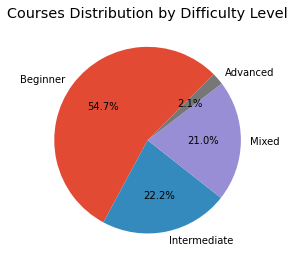

In [12]:
# difficulty level distribution
plt.style.use('ggplot')
levels = []
for i in df['course_difficulty']:
  if i not in levels:
    levels.append(i)

class_3 = df['course_difficulty'].value_counts()
fig4 = plt.pie(class_3, labels= levels, autopct='%.1f%%', startangle=45)

fig4 = plt.title("Courses Distribution by Difficulty Level")
plt.show()

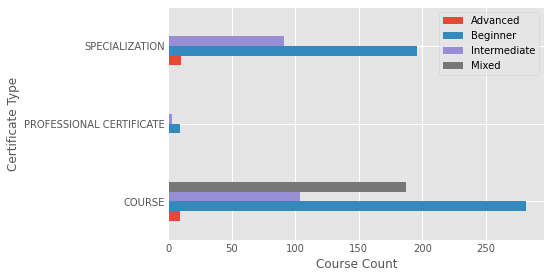

In [13]:
#for different types of courses, what is the difficulty distribution like?
#df_grouped_type = df.groupby('course_Certificate_type').sum()['course_difficulty']
fig5 = df.groupby(['course_Certificate_type','course_difficulty',]).size().unstack().plot(kind='barh', stacked=False)
fig5 = plt.ylabel("Certificate Type")
fig5 = plt.xlabel('Course Count')
fig5 = plt.xticks(rotation = 0)
fig5 = plt.legend()

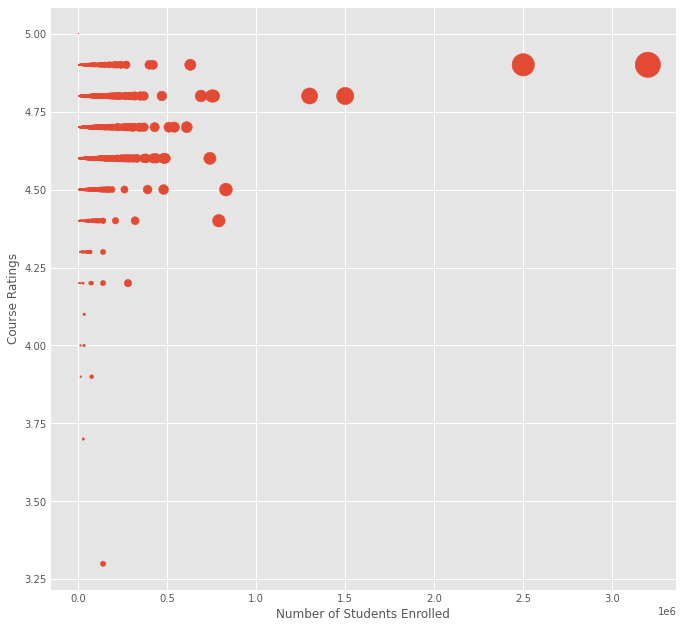

In [18]:
#correlation between ratings and number of students enrolled?


from pylab import rcParams
fig6 = plt.scatter(df['new_course_students_enrolled'],df['course_rating'],s=df['new_course_students_enrolled']/5000)
fig6 = plt.rcParams["figure.figsize"] = (10,10)
fig6 = plt.xlabel('Number of Students Enrolled')
fig6 = plt.ylabel('Course Ratings')

# Regression Analysis


In this section, to explore whether there is a valid relationship between *course difficulty* or *course type* and *course ratings*.I used MLR to regress type and difficulty level respectively on ratings to test the correlation.

In [119]:
#ratings of courses by course type; first turn categorial variable course_certificate_type to dummy variables then perform OLS
df_dummy_type = pd.get_dummies(df['course_Certificate_type'])
df_dummy_type['course_rating'] = df['course_rating']
print(df_dummy_type)

X = df_dummy_type[['COURSE','PROFESSIONAL CERTIFICATE','SPECIALIZATION']]
y = df_dummy_type['course_rating']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



     COURSE  PROFESSIONAL CERTIFICATE  SPECIALIZATION  course_rating
0         0                         0               1            4.7
1         1                         0               0            4.7
2         1                         0               0            4.5
3         1                         0               0            4.7
4         1                         0               0            4.8
..      ...                       ...             ...            ...
886       0                         0               1            4.5
887       1                         0               0            4.8
888       0                         0               1            4.5
889       0                         0               1            4.6
890       0                         0               1            4.7

[891 rows x 4 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          course_rating   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     31.66
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.21e-14
Time:                        05:27:22   Log-Likelihood:                 387.44
No. Observations:                 891   AIC:                            -768.9
Df Residuals:                     888   BIC:                            -754.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
COURSE                       4.7070      0.007    723.706      0.000       4.694       4.720
PROFESSIONAL CERTIFICATE     4.7000      0.045    103.763      0.000       4.611       4.789
SPECIALIZATION               4.6182      0.009    507.226      0.000       4.600       4.636
==============================================================================
Omnibus:                      435.922   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4298.959
Skew:                          -1.993   Prob(JB):                         0.00
Kurtosis:                      12.996   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
#ratings by difficulty level; first turn categorial variable course_difficulty to dummy variables then preform OLS

df_dummy_level = pd.get_dummies(df['course_difficulty'])
df_dummy_level['course_rating'] = df['course_rating']
print(df_dummy_level)

X = df_dummy_level[['Advanced','Beginner', 'Intermediate','Mixed']]
y = df_dummy_level['course_rating']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


     Advanced  Beginner  Intermediate  Mixed  course_rating
0           0         1             0      0            4.7
1           0         0             1      0            4.7
2           0         0             0      1            4.5
3           0         0             0      1            4.7
4           0         0             0      1            4.8
..        ...       ...           ...    ...            ...
886         0         0             1      0            4.5
887         0         0             0      1            4.8
888         0         0             1      0            4.5
889         0         0             1      0            4.6
890         0         1             0      0            4.7

[891 rows x 5 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          course_rating   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     6.328
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           0.000301
Time:                        05:27:22   Log-Likelihood:                 366.19
No. Observations:                 891   AIC:                            -724.4
Df Residuals:                     887   BIC:                            -705.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Advanced         4.6000      0.037    124.705      0.000       4.528       4.672
Beginner         4.6809      0.007    642.454      0.000       4.667       4.695
Intermediate     4.6465      0.011    406.634      0.000       4.624       4.669
Mixed            4.7086      0.012    400.458      0.000       4.685       4.732
==============================================================================
Omnibus:                      411.144   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3630.550
Skew:                          -1.888   Prob(JB):                         0.00
Kurtosis:                      12.140   Cond. No.                         5.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both regression gave very small R-squared values, meaning that either course_certificate_type or course_difficulty can explain the variation in student ratings sufficiently. 
